In [0]:
!pip install h2o

In [0]:
import h2o
from h2o.automl import H2OAutoML
import json
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,14 mins 12 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,19 hours
H2O cluster name:,H2O_from_python_unknownUser_jf5rqi
H2O cluster total nodes:,1
H2O cluster free memory:,2.955 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"


In [0]:
from google.colab import files
uploaded = files.upload()

Saving salary-information-for-local-development-corporations.csv to salary-information-for-local-development-corporations.csv


In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import io
df2 = pd.read_csv(io.BytesIO(uploaded['salary-information-for-local-development-corporations.csv']))

In [0]:
df2.describe()

,Base Annualized Salary,Actual Salary Paid,Overtime Paid,Performance Bonus,Extra Pay,Other Compensation,Total Compensation
count,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000
mean,51375.574215,45531.914005,503.072217,187.646393,707.279075,284.796602,47214.708291
std,46389.708136,45151.498303,2505.922241,1421.146394,1814.287854,3084.330007,46790.584407
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2524.000000,-2524.000000
25%,2151.060000,1282.350000,0.000000,0.000000,0.000000,0.000000,1397.060000
50%,49797.000000,40822.600000,0.000000,0.000000,0.000000,0.000000,42704.800000
75%,77405.000000,70805.930000,0.000000,0.000000,0.000000,0.000000,73723.750000
max,244999.820000,244999.820000,58255.140000,45000.000000,60375.410000,236611.570000,366522.820000


In [0]:
df2.head()

,Authority Name,Fiscal Year End Date,Has Employees,Last Name,Middle Initial,First Name,Title,Group,Department,Pay Type,Exempt Indicator,Base Annualized Salary,Actual Salary Paid,Overtime Paid,Performance Bonus,Extra Pay,Other Compensation,Total Compensation,Paid By Another Entity,Paid by State or Local Government
0,"ATC of Buffalo and Erie County, Inc.",2011-12-31T00:00:00.000,NaN,Culliton,NaN,Al,Chief Operating Officer,Executive,NaN,FT,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y,Y
1,"ATC of Buffalo and Erie County, Inc.",2011-12-31T00:00:00.000,NaN,Schoeppich,NaN,Andrew,Chief Financial Officer,Executive,NaN,FT,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y,Y
2,"ATC of Buffalo and Erie County, Inc.",2011-12-31T00:00:00.000,NaN,Stebbins,NaN,Dave,Senior Project Manager,Professional,NaN,FT,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y,Y
3,"ATC of Buffalo and Erie County, Inc.",2011-12-31T00:00:00.000,NaN,Boudreau,NaN,Dawn,Compliance Officer,Professional,NaN,FT,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y,Y
4,Albany County Capital Resource Corporation,2015-12-31T00:00:00.000,NaN,Maikels,F,Allen,Accountant,Professional,NaN,PT,Y,4800.0,4800.0,0.0,0.0,0.0,0.0,4800.0,N,NaN


In [0]:
df2.isnull().sum()

Authority Name                          0
Fiscal Year End Date                    0
Has Employees                        8375
Last Name                             728
Middle Initial                       8069
First Name                            728
Title                                 728
Group                                 728
Department                           5778
Pay Type                              728
Exempt Indicator                      728
Base Annualized Salary                728
Actual Salary Paid                    728
Overtime Paid                         728
Performance Bonus                     728
Extra Pay                             728
Other Compensation                    728
Total Compensation                    728
Paid By Another Entity                728
Paid by State or Local Government    7478
dtype: int64

In [0]:
#Dropping the columns
df2.drop('Fiscal Year End Date',axis='columns',inplace=True)
df2.drop('Has Employees',axis='columns',inplace=True)
df2.drop('Last Name',axis='columns',inplace=True)
df2.drop('Middle Initial',axis='columns',inplace=True) 
df2.drop('First Name',axis='columns',inplace=True) 
df2.drop('Authority Name',axis='columns',inplace=True) 
df2.drop('Title',axis='columns',inplace=True)
df2.drop('Department',axis='columns',inplace=True)

In [0]:
# To fimd the percentage of the null values given
total = df2.isnull().sum()[df2.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df2)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
Paid by State or Local Government,7478,82.15
Paid By Another Entity,728,8.00
Total Compensation,728,8.00
Other Compensation,728,8.00
Extra Pay,728,8.00
Performance Bonus,728,8.00
Overtime Paid,728,8.00
Actual Salary Paid,728,8.00
Base Annualized Salary,728,8.00
Exempt Indicator,728,8.00


In [0]:
# changing the notation of the columns
df2.columns = df2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df2

,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government
0,Executive,FT,Y,0.00,0.00,0.00,0.0,0.00,0.00,0.00,Y,Y
1,Executive,FT,Y,0.00,0.00,0.00,0.0,0.00,0.00,0.00,Y,Y
2,Professional,FT,Y,0.00,0.00,0.00,0.0,0.00,0.00,0.00,Y,Y
3,Professional,FT,Y,0.00,0.00,0.00,0.0,0.00,0.00,0.00,Y,Y
4,Professional,PT,Y,4800.00,4800.00,0.00,0.0,0.00,0.00,4800.00,N,NaN
5,Professional,PT,Y,4800.00,4800.00,0.00,0.0,0.00,0.00,4800.00,N,NaN
6,Managerial,FT,Y,65000.00,27500.00,0.00,0.0,0.00,0.00,27500.00,N,NaN
7,Executive,FT,Y,75000.00,75000.00,0.00,0.0,0.00,0.00,75000.00,N,NaN
8,Executive,FT,Y,100000.00,16538.46,0.00,0.0,0.00,0.00,16538.46,N,NaN
9,Professional,FT,Y,75000.00,37502.40,0.00,0.0,0.00,0.00,37502.40,N,NaN


In [0]:
#one hot encode
g={"group":{"Managerial":6,"Technical and Engineering":5,"Professional":4,"Operational":3,"Executive":2,"Administrative and Clerical":1}}
df2.replace(g, inplace=True)
df2.head(10)

,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government
0,2.0,FT,Y,0.0,0.00,0.0,0.0,0.0,0.0,0.00,Y,Y
1,2.0,FT,Y,0.0,0.00,0.0,0.0,0.0,0.0,0.00,Y,Y
2,4.0,FT,Y,0.0,0.00,0.0,0.0,0.0,0.0,0.00,Y,Y
3,4.0,FT,Y,0.0,0.00,0.0,0.0,0.0,0.0,0.00,Y,Y
4,4.0,PT,Y,4800.0,4800.00,0.0,0.0,0.0,0.0,4800.00,N,NaN
5,4.0,PT,Y,4800.0,4800.00,0.0,0.0,0.0,0.0,4800.00,N,NaN
6,6.0,FT,Y,65000.0,27500.00,0.0,0.0,0.0,0.0,27500.00,N,NaN
7,2.0,FT,Y,75000.0,75000.00,0.0,0.0,0.0,0.0,75000.00,N,NaN
8,2.0,FT,Y,100000.0,16538.46,0.0,0.0,0.0,0.0,16538.46,N,NaN
9,4.0,FT,Y,75000.0,37502.40,0.0,0.0,0.0,0.0,37502.40,N,NaN


In [0]:
#one hot encode
g={"pay_type":{"PT":0,"FT":1}}
df2.replace(g, inplace=True)
df2.head(10)

,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government
0,2.0,1.0,Y,0.0,0.00,0.0,0.0,0.0,0.0,0.00,Y,Y
1,2.0,1.0,Y,0.0,0.00,0.0,0.0,0.0,0.0,0.00,Y,Y
2,4.0,1.0,Y,0.0,0.00,0.0,0.0,0.0,0.0,0.00,Y,Y
3,4.0,1.0,Y,0.0,0.00,0.0,0.0,0.0,0.0,0.00,Y,Y
4,4.0,0.0,Y,4800.0,4800.00,0.0,0.0,0.0,0.0,4800.00,N,NaN
5,4.0,0.0,Y,4800.0,4800.00,0.0,0.0,0.0,0.0,4800.00,N,NaN
6,6.0,1.0,Y,65000.0,27500.00,0.0,0.0,0.0,0.0,27500.00,N,NaN
7,2.0,1.0,Y,75000.0,75000.00,0.0,0.0,0.0,0.0,75000.00,N,NaN
8,2.0,1.0,Y,100000.0,16538.46,0.0,0.0,0.0,0.0,16538.46,N,NaN
9,4.0,1.0,Y,75000.0,37502.40,0.0,0.0,0.0,0.0,37502.40,N,NaN


In [0]:
#one hot encode
g={"exempt_indicator":{"Y":1,"N":0}}
df2.replace(g, inplace=True)
df2.head(10)

,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government
0,2.0,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,Y,Y
1,2.0,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,Y,Y
2,4.0,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,Y,Y
3,4.0,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,Y,Y
4,4.0,0.0,1.0,4800.0,4800.00,0.0,0.0,0.0,0.0,4800.00,N,NaN
5,4.0,0.0,1.0,4800.0,4800.00,0.0,0.0,0.0,0.0,4800.00,N,NaN
6,6.0,1.0,1.0,65000.0,27500.00,0.0,0.0,0.0,0.0,27500.00,N,NaN
7,2.0,1.0,1.0,75000.0,75000.00,0.0,0.0,0.0,0.0,75000.00,N,NaN
8,2.0,1.0,1.0,100000.0,16538.46,0.0,0.0,0.0,0.0,16538.46,N,NaN
9,4.0,1.0,1.0,75000.0,37502.40,0.0,0.0,0.0,0.0,37502.40,N,NaN


In [0]:
#one hot encode
g={"paid_by_another_entity":{"Y":1,"N":0}}
df2.replace(g, inplace=True)
df2.head(10)

,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government
0,2.0,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1.0,Y
1,2.0,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1.0,Y
2,4.0,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1.0,Y
3,4.0,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1.0,Y
4,4.0,0.0,1.0,4800.0,4800.00,0.0,0.0,0.0,0.0,4800.00,0.0,NaN
5,4.0,0.0,1.0,4800.0,4800.00,0.0,0.0,0.0,0.0,4800.00,0.0,NaN
6,6.0,1.0,1.0,65000.0,27500.00,0.0,0.0,0.0,0.0,27500.00,0.0,NaN
7,2.0,1.0,1.0,75000.0,75000.00,0.0,0.0,0.0,0.0,75000.00,0.0,NaN
8,2.0,1.0,1.0,100000.0,16538.46,0.0,0.0,0.0,0.0,16538.46,0.0,NaN
9,4.0,1.0,1.0,75000.0,37502.40,0.0,0.0,0.0,0.0,37502.40,0.0,NaN


In [0]:
#one hot encode
g={"paid_by_state_or_local_government":{"Y":1,"N":0}}
df2.replace(g, inplace=True)
df2.head(10)

,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government
0,2.0,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1.0,1.0
1,2.0,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1.0,1.0
2,4.0,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1.0,1.0
3,4.0,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,1.0,1.0
4,4.0,0.0,1.0,4800.0,4800.00,0.0,0.0,0.0,0.0,4800.00,0.0,NaN
5,4.0,0.0,1.0,4800.0,4800.00,0.0,0.0,0.0,0.0,4800.00,0.0,NaN
6,6.0,1.0,1.0,65000.0,27500.00,0.0,0.0,0.0,0.0,27500.00,0.0,NaN
7,2.0,1.0,1.0,75000.0,75000.00,0.0,0.0,0.0,0.0,75000.00,0.0,NaN
8,2.0,1.0,1.0,100000.0,16538.46,0.0,0.0,0.0,0.0,16538.46,0.0,NaN
9,4.0,1.0,1.0,75000.0,37502.40,0.0,0.0,0.0,0.0,37502.40,0.0,NaN


In [0]:
# to see the null values
df2.isnull().sum()

group                                 728
pay_type                              728
exempt_indicator                      728
base_annualized_salary                728
actual_salary_paid                    728
overtime_paid                         728
performance_bonus                     728
extra_pay                             728
other_compensation                    728
total_compensation                    728
paid_by_another_entity                728
paid_by_state_or_local_government    7478
dtype: int64

In [0]:
#to change the data types of the column
df2["pay_type"] = df2.pay_type.convert_objects(convert_numeric=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [0]:
#calculating the median value
p=df2.group.median()
p

4.0

In [0]:
#Removing the null values
df2.replace("" , np.nan, inplace=True)
#null values are replaced by the median value
df2.group=df2.group.fillna(p)

In [0]:
df2.pay_type=df2.pay_type.fillna(p)
df2.exempt_indicator=df2.exempt_indicator.fillna(p)
df2.base_annualized_salary=df2.base_annualized_salary.fillna(p)
df2.actual_salary_paid=df2.actual_salary_paid.fillna(p)
df2.overtime_paid=df2.overtime_paid.fillna(p)
df2.performance_bonus=df2.performance_bonus.fillna(p)
df2.extra_pay=df2.extra_pay.fillna(p)
df2.other_compensation=df2.other_compensation.fillna(p)
df2.total_compensation=df2.total_compensation.fillna(p)
df2.paid_by_another_entity=df2.paid_by_another_entity.fillna(p)
df2.paid_by_state_or_local_government=df2.paid_by_state_or_local_government.fillna(p)

In [0]:
#checking the null values
print('number of missing data:')
print(df2.isnull().sum())

number of missing data:
group                                0
pay_type                             0
exempt_indicator                     0
base_annualized_salary               0
actual_salary_paid                   0
overtime_paid                        0
performance_bonus                    0
extra_pay                            0
other_compensation                   0
total_compensation                   0
paid_by_another_entity               0
paid_by_state_or_local_government    0
dtype: int64


In [0]:
#to find the data type of the model
df2.dtypes

group                                float64
pay_type                             float64
exempt_indicator                     float64
base_annualized_salary               float64
actual_salary_paid                   float64
overtime_paid                        float64
performance_bonus                    float64
extra_pay                            float64
other_compensation                   float64
total_compensation                   float64
paid_by_another_entity               float64
paid_by_state_or_local_government    float64
dtype: object

In [0]:
df2.corr()

,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government
group,1.000000,0.222448,0.257006,0.248772,0.228743,-0.014783,0.066168,0.172415,-0.026607,0.226657,0.096132,0.143279
pay_type,0.222448,1.000000,0.841720,-0.056641,-0.047984,-0.005478,-0.002835,-0.010648,-0.006285,-0.047549,0.801626,0.253067
exempt_indicator,0.257006,0.841720,1.000000,-0.133641,-0.129348,-0.159560,-0.050304,-0.019487,-0.025291,-0.136930,0.853659,0.072214
base_annualized_salary,0.248772,-0.056641,-0.133641,1.000000,0.931908,0.033521,0.179463,0.424765,0.079130,0.927172,-0.448707,0.439370
actual_salary_paid,0.228743,-0.047984,-0.129348,0.931908,1.000000,0.060595,0.195881,0.466700,0.071941,0.995867,-0.414153,0.409482
overtime_paid,-0.014783,-0.005478,-0.159560,0.033521,0.060595,1.000000,0.002136,0.050689,0.006197,0.112414,-0.086702,0.088589
performance_bonus,0.066168,-0.002835,-0.050304,0.179463,0.195881,0.002136,1.000000,0.050328,-0.008110,0.219723,-0.056610,0.058389
extra_pay,0.172415,-0.010648,-0.019487,0.424765,0.466700,0.050689,0.050328,1.000000,-0.012879,0.491119,-0.167692,0.170806
other_compensation,-0.026607,-0.006285,-0.025291,0.079130,0.071941,0.006197,-0.008110,-0.012879,1.000000,0.132428,-0.033170,0.023811
total_compensation,0.226657,-0.047549,-0.136930,0.927172,0.995867,0.112414,0.219723,0.491119,0.132428,1.000000,-0.414234,0.409299


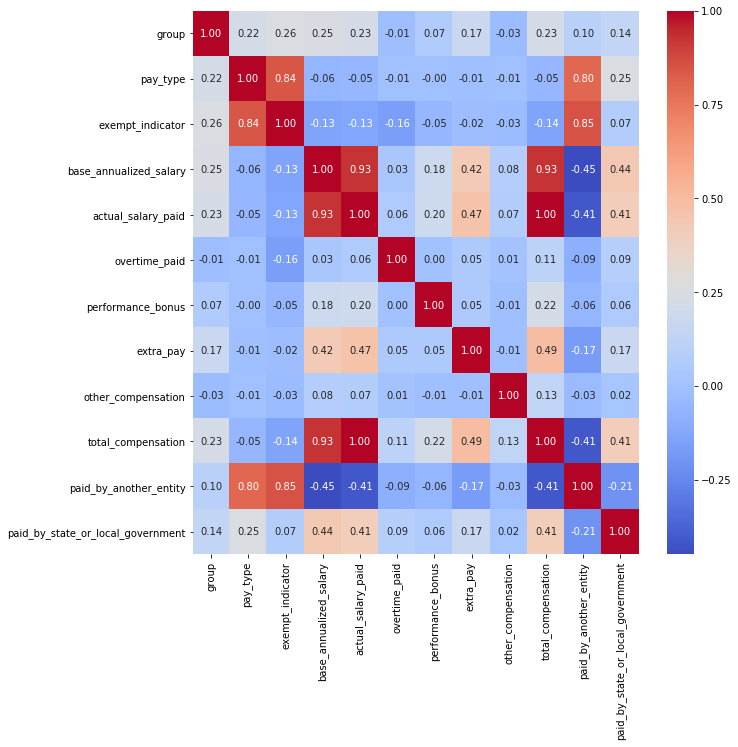

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df2.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [0]:
df2.to_csv('new.csv')

In [0]:
# Load data into H2O
df2 = h2o.import_file("new.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
target ='base_annualized_salary'

In [0]:
# assign target and inputs for logistic regression


In [0]:
# assign target and inputs for logistic regression
y = target
X = [name for name in df2.columns if name != y]
print(y)
print(X)

base_annualized_salary
['C1', 'group', 'pay_type', 'exempt_indicator', 'actual_salary_paid', 'overtime_paid', 'performance_bonus', 'extra_pay', 'other_compensation', 'total_compensation', 'paid_by_another_entity', 'paid_by_state_or_local_government']


In [0]:
project ="automl_test"
run_time=500

In [0]:
df2.describe()

Rows:9103
Cols:13




,C1,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government
type,int,int,int,int,real,real,real,real,real,real,real,int,int
mins,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2524.0,-2524.0,0.0,0.0
mean,4551.0,3.2532132264088762,1.0091178732286057,0.9017906184774255,47267.20268592772,41890.88122487094,463.1595979347467,172.95952323409875,651.0352905635507,262.3402768318137,43439.09633527408,0.4984071185323516,3.399318905855211
maxs,9102.0,6.0,4.0,4.0,244999.82,244999.82,58255.14,45000.0,60375.41,236611.57,366522.82,4.0,4.0
sigma,2627.954083820086,1.4756257220219522,0.9749805319243621,1.0238960330304994,46627.01553708005,45034.75630128213,2407.4287607802016,1364.0387710547752,1750.6463822877488,2959.3941101763176,46671.840098201035,1.0999154450642032,1.3046018215073607
zeros,1,0,2101,3078,1815,1882,7520,7877,6543,7734,1851,6750,593
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [0]:
df2.head()

C1,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government
0,2,1,1,0,0,0,0,0,0,0,1,1
1,2,1,1,0,0,0,0,0,0,0,1,1
2,4,1,1,0,0,0,0,0,0,0,1,1
3,4,1,1,0,0,0,0,0,0,0,1,1
4,4,0,1,4800,4800,0,0,0,0,4800,0,4
5,4,0,1,4800,4800,0,0,0,0,4800,0,4
6,6,1,1,65000,27500,0,0,0,0,27500,0,4
7,2,1,1,75000,75000,0,0,0,0,75000,0,4
8,2,1,1,100000,16538.5,0,0,0,0,16538.5,0,4
9,4,1,1,75000,37502.4,0,0,0,0,37502.4,0,4


In [0]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) # init automl, run for 333 seconds
aml.train(x=X,  
           y=y,
           training_frame=df2)

AutoML progress: |████████████████████████████████████████████████

In [79]:
df2.head()

C1,group,pay_type,exempt_indicator,base_annualized_salary,actual_salary_paid,overtime_paid,performance_bonus,extra_pay,other_compensation,total_compensation,paid_by_another_entity,paid_by_state_or_local_government
0,2,1,1,0,0,0,0,0,0,0,1,1
1,2,1,1,0,0,0,0,0,0,0,1,1
2,4,1,1,0,0,0,0,0,0,0,1,1
3,4,1,1,0,0,0,0,0,0,0,1,1
4,4,0,1,4800,4800,0,0,0,0,4800,0,4
5,4,0,1,4800,4800,0,0,0,0,4800,0,4
6,6,1,1,65000,27500,0,0,0,0,27500,0,4
7,2,1,1,75000,75000,0,0,0,0,75000,0,4
8,2,1,1,100000,16538.5,0,0,0,0,16538.5,0,4
9,4,1,1,75000,37502.4,0,0,0,0,37502.4,0,4


In [0]:
# view leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

In [81]:
print(lb.nrows)

43


In [82]:
from datetime import datetime
import time
import random, os, sys
data_path=None
all_variables=None
test_path=None
# target='search_term'
target='base_annualized_salary'
nthreads=1 
min_mem_size=6 
run_time=500
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

C7yTsizGk


In [0]:
def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  m_data={}
  m_data['start_time'] = time.time()
  m_data['target']=target
  m_data['server_path']=server
  m_data['data_path']=data 
  m_data['test_path']=test
  m_data['max_models']=model
  m_data['run_time']=run_time
  m_data['run_id'] =run_id
  m_data['scale']=scale
  m_data['classification']=classification
  m_data['scale']=False
  m_data['model_path']=model_path
  m_data['balance']=balance
  m_data['balance_threshold']=balance_threshold
  m_data['project'] =name
  m_data['end_time'] = time.time()
  m_data['execution_time'] = 0.0
  m_data['run_path'] =path
  m_data['nthreads'] = nthreads
  m_data['min_mem_size'] = min_mem_size
  m_data['analysis'] = analysis
  return m_data

In [84]:
# meta data
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1555532874.8379576, 'target': 'base_annualized_salary', 'server_path': '/content/yLkJAi9mb', 'data_path': None, 'test_path': None, 'max_models': 9, 'run_time': 500, 'run_id': 'C7yTsizGk', 'scale': False, 'classification': False, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1555532874.8379629, 'execution_time': 0.0, 'run_path': '/content/yLkJAi9mb/C7yTsizGk', 'nthreads': 1, 'min_mem_size': 6, 'analysis': 0}


In [0]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
# Get model ids for all models in the AutoML Leaderboard
type(model_set)

In [0]:
jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  #print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)

In [0]:
print(jsonDicts)

In [0]:
#@title
# mod_best.params

In [0]:
#@title
# best_model = h2o.get_model(aml.leaderboard[0,'model_id'])#Getting the best model based on the leaderboard

In [0]:
#@title
# best_model.algo# Name of the Algorithm for the best model

In [91]:
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='Base_Annualized_Salary_hyperparameters.json'
hyperparameter_json(jsonDicts,'hyperparameters_500.json') 
hyperparameter_json(meta_data,'meta_data_500.json') 
hyperparameter_json(lb,'lb_500.json') 

TypeError: ignored

In [0]:
# from IPython.display import IFrame

In [0]:
# IFrame(src='./HP_Database_UML_Diagram.html', width=900, height=700)

In [0]:
project ="automl_test"
run_time=700

In [0]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) # init automl, run for 333 seconds
aml.train(x=X,  
           y=y,
           training_frame=df2)

In [0]:
from datetime import datetime
import time
import random, os, sys
data_path=None
all_variables=None
test_path=None
# target='search_term'
target='base_annualized_salary'
nthreads=1 
min_mem_size=6 
run_time=700
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  m_data={}
  m_data['start_time'] = time.time()
  m_data['target']=target
  m_data['server_path']=server
  m_data['data_path']=data 
  m_data['test_path']=test
  m_data['max_models']=model
  m_data['run_time']=run_time
  m_data['run_id'] =run_id
  m_data['scale']=scale
  m_data['classification']=classification
  m_data['scale']=False
  m_data['model_path']=model_path
  m_data['balance']=balance
  m_data['balance_threshold']=balance_threshold
  m_data['project'] =name
  m_data['end_time'] = time.time()
  m_data['execution_time'] = 0.0
  m_data['run_path'] =path
  m_data['nthreads'] = nthreads
  m_data['min_mem_size'] = min_mem_size
  m_data['analysis'] = analysis
  return m_data

# meta data
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)


In [0]:
# view leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

In [0]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
# Get model ids for all models in the AutoML Leaderboard
type(model_set)

jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  #print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)
  
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='hyperparameters_700.json'
hyperparameter_json(jsonDicts,name) 
hyperparameter_json(meta_data,'meta_data_700.json') 
hyperparameter_json(lb,'lb_700.json') 


In [0]:
# print(mod_best.logloss)
# print(mod_best.algo)
# print(mod_best.model_id)
# print(mod_best.gini)

In [0]:
# mod_best.params

In [0]:
# best_model = h2o.get_model(aml.leaderboard[0,'model_id'])#Getting the best model based on the leaderboard

In [0]:
# best_model.algo# Name of the Algorithm for the best model

In [0]:
project ="automl_test"
run_time=900

In [0]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) # init automl, run for 333 seconds
aml.train(x=X,  
           y=y,
           training_frame=df2)

In [0]:
from datetime import datetime
import time
import random, os, sys
data_path=None
all_variables=None
test_path=None
# target='search_term'
target='base_annualized_salary'
nthreads=1 
min_mem_size=6 
run_time=900
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  m_data={}
  m_data['start_time'] = time.time()
  m_data['target']=target
  m_data['server_path']=server
  m_data['data_path']=data 
  m_data['test_path']=test
  m_data['max_models']=model
  m_data['run_time']=run_time
  m_data['run_id'] =run_id
  m_data['scale']=scale
  m_data['classification']=classification
  m_data['scale']=False
  m_data['model_path']=model_path
  m_data['balance']=balance
  m_data['balance_threshold']=balance_threshold
  m_data['project'] =name
  m_data['end_time'] = time.time()
  m_data['execution_time'] = 0.0
  m_data['run_path'] =path
  m_data['nthreads'] = nthreads
  m_data['min_mem_size'] = min_mem_size
  m_data['analysis'] = analysis
  return m_data

# meta data
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

In [0]:
# view leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)


In [0]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
# Get model ids for all models in the AutoML Leaderboard
type(model_set)

jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  #print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)
  
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='hyperparameters_900.json'
hyperparameter_json(jsonDicts,name) 
hyperparameter_json(meta_data,'meta_data_900.json') 
hyperparameter_json(lb,'lb_900.json') 

In [0]:
# print(mod_best.logloss)
# print(mod_best.algo)
# print(mod_best.model_id)
# print(mod_best.gini)

In [0]:
project ="automl_test"
run_time=1100

In [0]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) # init automl, run for 333 seconds
aml.train(x=X,  
           y=y,
           training_frame=df2)

In [0]:
from datetime import datetime
import time
import random, os, sys
data_path=None
all_variables=None
test_path=None
# target='search_term'
target='base_annualized_salary'
nthreads=1 
min_mem_size=6 
run_time=1100
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  m_data={}
  m_data['start_time'] = time.time()
  m_data['target']=target
  m_data['server_path']=server
  m_data['data_path']=data 
  m_data['test_path']=test
  m_data['max_models']=model
  m_data['run_time']=run_time
  m_data['run_id'] =run_id
  m_data['scale']=scale
  m_data['classification']=classification
  m_data['scale']=False
  m_data['model_path']=model_path
  m_data['balance']=balance
  m_data['balance_threshold']=balance_threshold
  m_data['project'] =name
  m_data['end_time'] = time.time()
  m_data['execution_time'] = 0.0
  m_data['run_path'] =path
  m_data['nthreads'] = nthreads
  m_data['min_mem_size'] = min_mem_size
  m_data['analysis'] = analysis
  return m_data

# meta data
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

In [0]:
# view leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)


In [0]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
# Get model ids for all models in the AutoML Leaderboard
type(model_set)

jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  #print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)
  
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='hyperparameters_1100.json'
hyperparameter_json(jsonDicts,name) 
hyperparameter_json(meta_data,'meta_data_1100.json') 
hyperparameter_json(lb,'lb_1100.json') 

In [0]:
project ="automl_test"
run_time=1300

In [0]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) # init automl, run for 333 seconds
aml.train(x=X,  
           y=y,
           training_frame=df2)

In [0]:
from datetime import datetime
import time
import random, os, sys
data_path=None
all_variables=None
test_path=None
# target='search_term'
target='base_annualized_salary'
nthreads=1 
min_mem_size=6 
run_time=1300
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  m_data={}
  m_data['start_time'] = time.time()
  m_data['target']=target
  m_data['server_path']=server
  m_data['data_path']=data 
  m_data['test_path']=test
  m_data['max_models']=model
  m_data['run_time']=run_time
  m_data['run_id'] =run_id
  m_data['scale']=scale
  m_data['classification']=classification
  m_data['scale']=False
  m_data['model_path']=model_path
  m_data['balance']=balance
  m_data['balance_threshold']=balance_threshold
  m_data['project'] =name
  m_data['end_time'] = time.time()
  m_data['execution_time'] = 0.0
  m_data['run_path'] =path
  m_data['nthreads'] = nthreads
  m_data['min_mem_size'] = min_mem_size
  m_data['analysis'] = analysis
  return m_data

# meta data
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

In [0]:
# view leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)


In [0]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
# Get model ids for all models in the AutoML Leaderboard
type(model_set)

jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  #print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)
  
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='hyperparameters_1300.json'
hyperparameter_json(jsonDicts,name) 
hyperparameter_json(meta_data,'meta_data_1300.json') 
hyperparameter_json(lb,'lb_1300.json') 

In [0]:
project ="automl_test"
run_time=1500

In [0]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name = project) # init automl, run for 333 seconds
aml.train(x=X,  
           y=y,
           training_frame=df2)

In [0]:
from datetime import datetime
import time
import random, os, sys
data_path=None
all_variables=None
test_path=None
# target='search_term'
target='base_annualized_salary'
nthreads=1 
min_mem_size=6 
run_time=1500
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str

run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir)    

# run_id to std out
print (run_id)

def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  m_data={}
  m_data['start_time'] = time.time()
  m_data['target']=target
  m_data['server_path']=server
  m_data['data_path']=data 
  m_data['test_path']=test
  m_data['max_models']=model
  m_data['run_time']=run_time
  m_data['run_id'] =run_id
  m_data['scale']=scale
  m_data['classification']=classification
  m_data['scale']=False
  m_data['model_path']=model_path
  m_data['balance']=balance
  m_data['balance_threshold']=balance_threshold
  m_data['project'] =name
  m_data['end_time'] = time.time()
  m_data['execution_time'] = 0.0
  m_data['run_path'] =path
  m_data['nthreads'] = nthreads
  m_data['min_mem_size'] = min_mem_size
  m_data['analysis'] = analysis
  return m_data

# meta data
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

In [0]:
# view leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)
print(lb.nrows)

In [0]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
# Get model ids for all models in the AutoML Leaderboard
type(model_set)

jsonDicts= []
for id in model_set.iteritems():
  id,model_name = id
  #print(model_name)
  mod_best=h2o.get_model(model_name)
  jsonDicts.append(mod_best.params)
  
def hyperparameter_json(jsonDicts,name):
    i = json.dumps(jsonDicts, indent=4)
    f = open(name, 'w')
    print(i, file=f)
    f.close()
# hyperparameters = mod_best.params
name='hyperparameters_1500.json'
hyperparameter_json(jsonDicts,name) 
hyperparameter_json(meta_data,'meta_data_1500.json') 
hyperparameter_json(lb,'lb_1500.json') 